<h3> LAB 10 - Filtragem Digital</h3>
<h5> Processamento Digital de Sinais I - TE352 </h5>
<h5> Leonardo Barbosa da Silva GRR20162855 </h5> 

In [1]:
# Inicializa os pacotes que serão utilizados
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

1) Considere o sinal x1 uma senoide de baixa frequência e o sinal x2 uma senoide de alta frequência e o sinal x sendo a soma destes dois:
n=0:31; x1=sin(4*pi*n/32); x2=sin(12*pi*n/32); x=x1 + x2; x0=[x zeros(1,32)];

In [2]:
t = np.linspace(0,6,32)
x1 = np.sin(np.pi*(4/64)*t)
x2 = np.sin(np.pi*(12/32)*t)
x = x1 + x2
x0 = np.concatenate((x, np.zeros(32)),axis=None)

2) Obtenha os coeficientes de um filtro elíptico de quarta ordem com frequência normalizada de corte igual a 0,25 (w=pi/4).

In [3]:
b,a = signal.ellip(4,1,20,0.25)
w,resp_filter = signal.freqz(b,a)

3) Visualize o espectro do sinal x e a resposta em frequência do filtro calculado, no mesmo eixo.

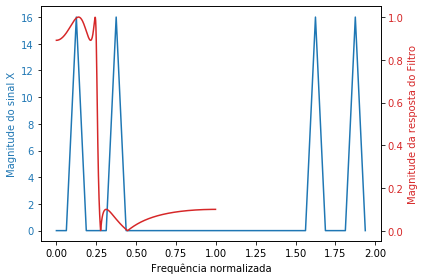

In [4]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Frequência normalizada')
ax1.set_ylabel('Magnitude do sinal X', color=color)
ax1.plot(np.linspace(0,len(x)-1,len(x))*2/len(x),abs(np.fft.fft(x)),color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:red'
ax2.set_ylabel('Magnitude da resposta do Filtro', color=color)  
ax2.plot(np.linspace(0,len(w)-1,len(w))/len(w),abs(resp_filter),color=color)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout() 
plt.show()

4) filtre o sinal x0 com a função comando filter()

In [5]:
x0_filtr=signal.lfilter(b,a,x0)
x0_filtr_f = np.fft.fft(x0_filtr)

5) filtre o sinal x realizando a convolução com a resposta impulsional do filtro (obtendo sinal com 64 pontos)

In [6]:
def impz(b,a,l):
    impulse = np.zeros(l, dtype=float)
    impulse[0] =1
    x = np.arange(0,l)
    response = signal.lfilter(b,a,impulse)
    return response

t = np.linspace(0,63,64)
f = np.linspace(-31,31,64)/2

resp_filtr_t = impz(b,a,33)
x_filtr_conv = signal.convolve(x, resp_filtr_t)
x_filtr_conv_f = np.fft.fft(x_filtr_conv)

6) filtre o sinal x, fazendo produto no domínio da frequência com a resposta em frequência do filtro (com 64 pontos)

In [7]:
w_filtro, resposta_filtro = signal.freqz(b,a,32)
resposta_filtro = np.transpose(resposta_filtro)
resposta_filtro = np.concatenate((resposta_filtro, 
                np.flip(resposta_filtro)),axis=None)

x_f = np.fft.fft(x0)
x_filtr_prod_f = np.multiply(x_f,resposta_filtro)
x_filtr_prod = np.fft.irfft(x_filtr_prod_f,64)

7) plote os 3 resultados no mesmo eixo 
   </br> a) No tempo

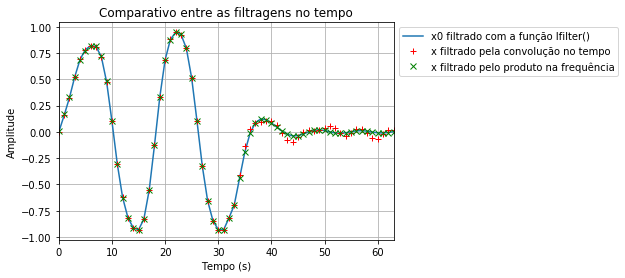

In [8]:
plt.grid(True)
plt.plot(t,x0_filtr)
plt.plot(t,x_filtr_conv,'r+')
plt.plot(t,x_filtr_prod,'gx')
plt.legend(['x0 filtrado com a função lfilter()', 
            'x filtrado pela convolução no tempo', 
            'x filtrado pelo produto na frequência'],
           loc='upper left', bbox_to_anchor=(1,1))
plt.title("Comparativo entre as filtragens no tempo")
plt.ylabel ('Amplitude')
plt.xlabel ('Tempo (s)')
plt.xlim (0, 63)
plt.show()


   </br> b) Em frequência

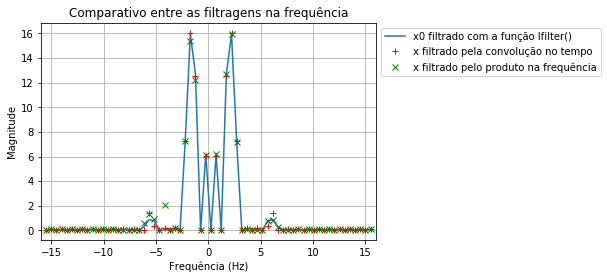

In [9]:
plt.grid(True)
plt.plot(f,np.fft.fftshift(abs(x0_filtr_f)))
plt.plot(f,np.fft.fftshift(abs(x_filtr_conv_f)),'r+')
plt.plot(f,np.fft.fftshift(abs(x_filtr_prod_f)),'gx')
plt.legend(['x0 filtrado com a função lfilter()', 
            'x filtrado pela convolução no tempo', 
            'x filtrado pelo produto na frequência'], 
           loc='upper left', bbox_to_anchor=(1,1))
plt.title("Comparativo entre as filtragens na frequência")
plt.ylabel ('Magnitude')
plt.xlabel ('Frequência (Hz)')
plt.xlim (-16, 16)
plt.show()